# In Class Assignment 3 - ME 363 (Spring 2022)

<font color='red'>__Question (1)__ </font>: Fit the function $y=\frac{\sqrt{4ax+1}-1}{2b}$, where $a$ and $b$ are constants, to 0.1 percent strain per second data set. Follow the steps described above to find the coefficients and print them and also plot the training data, test data, and fitted line on the same plot.

Evaluate the model you developed and compare its mean squared error and r-squared score with the second model developed in the class notebook.

Import data

In [2]:
import pandas as pd

xlsx = pd.ExcelFile('https://raw.githubusercontent.com/MasoudMiM/ME_364/master/StrainRate_CorticalBone/Cortical_Bone.xlsx')
df = pd.read_excel(xlsx,sheet_name='StrainRate_0.001', names=['Strain %','Stress (MPa)'])            # 0.001 percent strain per second

df.head()

,Strain %,Stress (MPa)
0,0.037524,7.596051
1,0.049875,10.375055
2,0.068346,12.876159
3,0.085598,15.599584
4,0.106908,20.518422


Basic plot of imported data

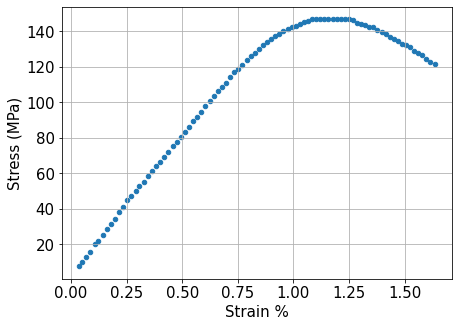

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = '15'
df.plot(kind='scatter',x='Strain %',y='Stress (MPa)',figsize=(7,5))
plt.grid(True)

Import libraries and define curve function

In [4]:
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
import numpy as np

x_data=df['Strain %']
y_data=df['Stress (MPa)']

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)

def my_func(x,a,b):
  output=(np.sqrt(4*a*x+1)-1)/(2*b)
  return output

Fit the curve and find the coefficients

In [5]:
popt, pcov = curve_fit(my_func, x_train, y_train)
#print the final parameters
print(f" a = {popt[0]:.3f}, b = {popt[1]:.3f}")

 a = 16.631, b = 0.029


Make predictions

In [6]:
yhat=my_func(x_test, popt[0], popt[1])

Plot fitted curve

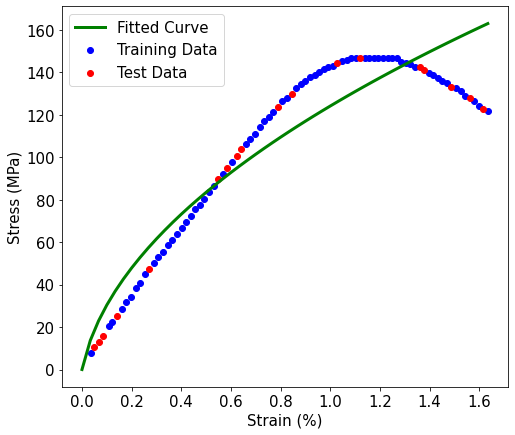

In [7]:
plt.rcParams['font.size'] = '15'
plt.figure(figsize=(8,7))

# plotting the training data
plt.scatter(x_train,y_train,color='blue',label='Training Data')

# Plotting the test data
plt.scatter(x_test,y_test,color='red',label='Test Data')

# plottign the fitted curve
xplot=np.linspace(0,max(x_train),num=50)
yplot=my_func(xplot,popt[0],popt[1])
plt.plot(xplot,yplot,color='green', lw=3,label='Fitted Curve')

# plots labeling and legend
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.legend(loc='best');

Model evaluation

In [8]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSETst=mean_squared_error(y_test,yhat)
print(f'The value of mean squared error is: {MSETst:0.3f}')

# R2
from sklearn.metrics import r2_score

r2scoreTst = r2_score(y_test,yhat)
print(f'The value of R2 is: {r2scoreTst:0.3f}')

The value of mean squared error is: 267.726
The value of R2 is: 0.886


<font color='red'>__Question (2)__</font>: Train a regression model with a 3rd degree polynomial to predict elongation using tensile strength (tension strength). Follow the steps in the class notebook to print the coefficients and plot the fitted line, training data, and test data on the same plot.

Find the relative squared error for both test data and training data for the model you developed. 


In [9]:
# First we'll reset everything
%reset

Upload new data

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/MasoudMiM/ME_364/main/3D_Printer_Data/3DPrinterDataset.csv'   # Link to the 3D printer data set
df = pd.read_csv(url)

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


Use pairplot to take a look at the data

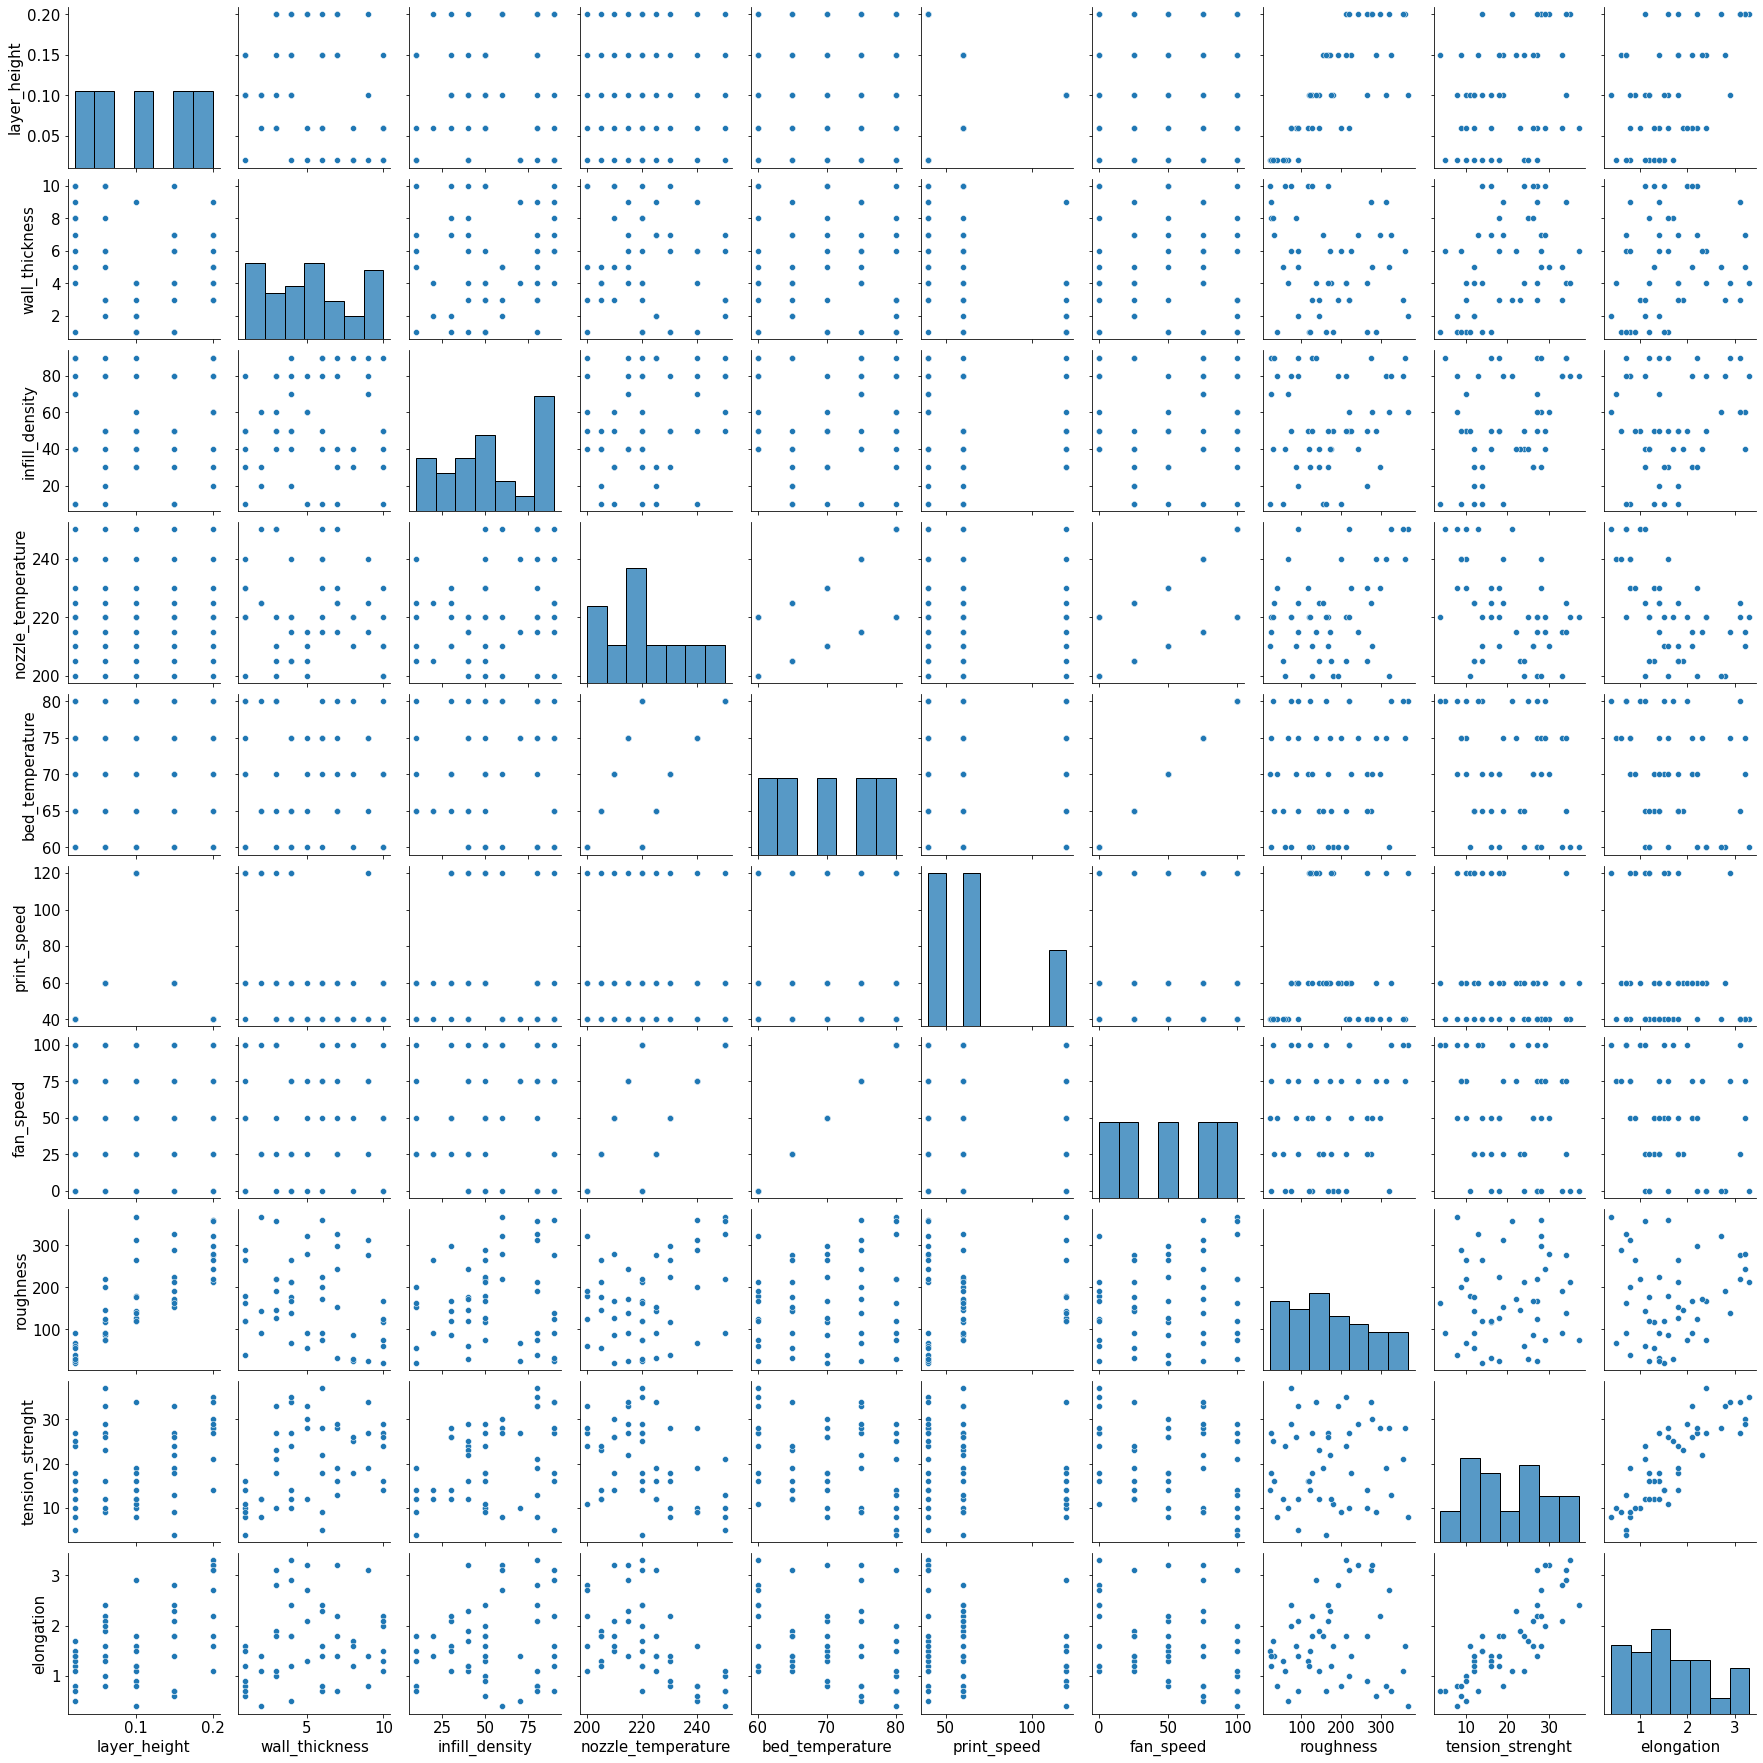

In [11]:
import seaborn as sns

sns.pairplot(df)

Define variables andsplit up testing and training data

In [12]:
y_dataPoly=np.array(df[['elongation']])
x_dataPoly=np.array(df[['tension_strenght']])

x_trainP,x_testP,y_trainP,y_testP=train_test_split(x_dataPoly, y_dataPoly, test_size=0.2, random_state=125)

Transform the data

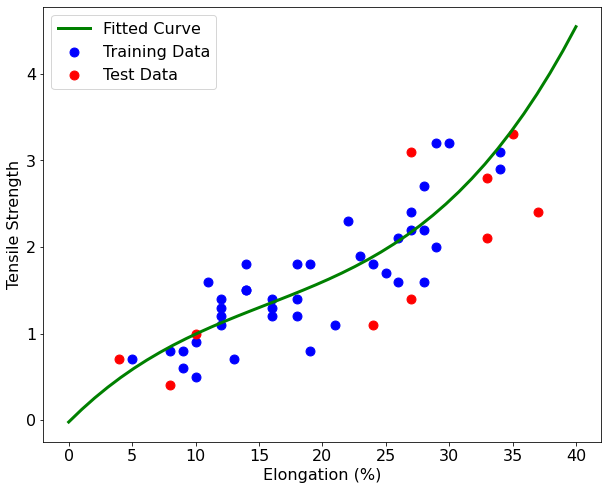

In [15]:
# Defining the polynomial and fit it into the data
poly3 = PolynomialFeatures(degree=3)  # for a 4th degree polynomial
x_train_transformedP3 = poly3.fit_transform(x_trainP)
x_test_transformedP3 = poly3.fit_transform(x_testP)
lmPoly3 = LinearRegression()
lmPoly3.fit(x_train_transformedP3, y_trainP)

# Predictions
yhatP3t=lmPoly3.predict(x_test_transformedP3)
yhatP3Tr=lmPoly3.predict(x_train_transformedP3)

# figure size and font size
plt.figure(figsize=(10,8))
plt.rc('font',size=16)

# Plotting the fitted curve
xplotP=np.linspace(0,40,num=40)
yplotP3=lmPoly3.intercept_[0]+lmPoly3.coef_[0][1]*xplotP+lmPoly3.coef_[0][2]*xplotP**2+lmPoly3.coef_[0][3]*xplotP**3
plt.plot(xplotP,yplotP3,color='green', lw=3, label='Fitted Curve')

# Plotting the training data
plt.scatter(x_trainP,y_trainP,color='blue',s=80, label='Training Data')

# Plotting the test data
plt.scatter(x_testP,y_testP,color='red',s=80, label='Test Data')

# Plot labels and legend
plt.xlabel('Elongation (%)')
plt.ylabel('Tensile Strength')
plt.legend(loc='best');

Evaluate the model

In [17]:
from sklearn.metrics import r2_score

## Evaluation using test data
rse4thp_test = 1-r2_score(y_testP,yhatP3t)
print('The value of RSE for test data for 4th degree polynomial regression is: %.2f' %rse4thp_test)

print('')
# Evaluation using train data
rse4thp_train = 1-r2_score(y_trainP,yhatP3Tr)
print('The value of RSE for training data for 4th degree polynomial regression is: %.2f' %rse4thp_train)

The value of RSE for test data for 4th degree polynomial regression is: 0.51

The value of RSE for training data for 4th degree polynomial regression is: 0.26
